In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib
import os
import girder_client
import plotly.express as px 

from postProcess import *

In [ ]:
import sys,os
dev_mode = True
preset = 'python'
feelpath = f"/data/home/elarif/devel/feel/feelpp.install/lib/python3/dist-packages"

if dev_mode and os.path.exists(feelpath) and feelpath not in sys.path:
    sys.path.insert(0, os.path.abspath(feelpath))
print(sys.path)
from pathlib import Path

[commande]<this-cell> 
The command to run nirb test error is : 

```shell 
mpiexec -n `Np` -bind-to core python3 run_nirb_perf.py --config-file `model` --Ntest `Nt` --Nbase `Nb` --idmodel `id` 
``` 

where : \
`Np` = (number of proc) \
`model`= (the cfg file of the model) \
`Nt` = (number of parameter in the sampling) \
`Nb` = (number of basis function in the offline step) \
`id` = (an identifiant for the model). It creates both distinct sampling for test and training associated with `id`if they are not exist. Sampling files will be named : `sampling_train_{id}_N{Nb}.sample` and `sampling_test_{id}_N{Nt}.sample`.

The returned error file is named : `errors{Nt}Params_{id}lmd{n}.csv` \
The parameter `n` represente the exponent used for the regularization parameter of the rectification pre-process. The parameter is given by : $lm = 10^{-n}$. Defaults value is `n=10`.


Plot error for 3D test case (Thermal fin 3D).

From the above command, we take :\
`Np = 16`\
`model = model/thermal-fin-3d/thermal-fin.cfg`\
`Nt = 20`\
`Nb = 100`\
`id = 3dfin` 

Plot time dependent error from local repository : 

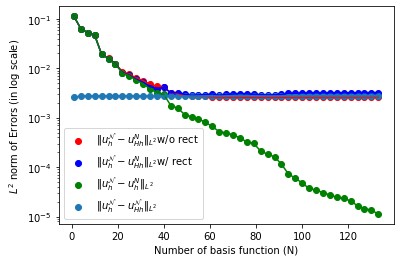

In [4]:
nproc = 4
ntest = 40
lmd = 10

home = os.path.expanduser('~/')
dataPath = home + f"feelppdb/nirb/heat/np_{nproc}/results/Rect/"
file = dataPath + f"noGreedy/errors{ntest}Params_s4lmd{lmd}.csv"


df = pd.read_csv(file) # read csv file 
l2df = getDataStat(df,h1norm=False) # get the mean, max and min of sampling error 

keys = 'Mean' # or 'Max', 'Min'
plotErrors(l2df, keys=keys,texSave=False) 


Plot error from remote (girder)

In [ ]:
import girder_client

gc = girder_client.GirderClient(apiUrl='https://girder.math.unistra.fr/api/v1')

In [ ]:
file = 'errorfile.csv'
gc.downloadFile("63fc8b77b0e9570495446ac5", path=file) # download from girder 

df = pd.read_csv(file) # read csv file 
l2df = getDataStat(df,h1norm=False) # get the mean, max and min of sampling error 

keys = 'Mean' # or 'Max', 'Min'
plotErrors(l2df, keys=keys,texSave=False) 

Plot error for 2D test case (Square domain divided into 4 sub-domain). \

From the top command, we take :\
`Np = 1`\
`model = model/square/square.cfg`\
`Nt = 30`\
`Nb = 100`\
`id = s4` 

In [ ]:
file = 'errorfile.csv'
id = "63fc8aa9b0e9570495446a8e"
gc.downloadFile(id, path=file) # download from girder 

df = pd.read_csv(file) # read csv file 
l2df = getDataStat(df,h1norm=False) # get the mean, max and min of sampling error 

keys = 'Mean' # or 'Max', 'Min'
plotErrors(l2df, keys=keys,texSave=False) 

Plot error for 2D test case (Square domain divided into 9 sub-domain). \

From the top command, we take :\
`Np = 1`\
`model = model/square/square9.cfg`\
`Nt = 30`\
`Nb = 100`\
`id = s9` 

In [ ]:
file = 'errorfile.csv'
id = "63fc8aaab0e9570495446aa9"
gc.downloadFile(id, path=file) # download from girder 

df = pd.read_csv(file) # read csv file 
l2df = getDataStat(df,h1norm=False) # get the mean, max and min of sampling error 

keys = 'Mean' # or 'Max', 'Min'
plotErrors(l2df, keys=keys,texSave=False)

Compare nirb error in respect to regularization parameter :\
We choose the square domain divided into 4 and 9 subdomains.\

The files are named by : "errors30Params_s4lmd{n}.csv".\
where `n` is the exponent associated to regularization parameter ($lm = 10^{-n}$). 

In [ ]:
### Case of 4 subdomains 
dir = "errorDatasS4"
id = "6407116eb0e9570495446ac6"
gc.downloadFolderRecursive(id, dir, sync=True)
cut1 = "errors30Params_s4lmd"
cut2 = ".csv"
listdfl2=[]
listlabel =[]

for f in os.listdir(dir):
    n = int(f[len(cut1):-len(cut2)])
    file = os.path.join(dir, f)
    dfG = pd.read_csv(file, sep=',')
    dl2 = getDataStat(dfG,h1norm=False)
    listdfl2.append(dl2)
    listlabel.append(f"$\lambda = 1.e^{n}$")


keys='Mean' # or 'Min', or 'Max'
compareListOfDataFrams(listdfl2, norm=keys, listlabel=listlabel, rectif=True)



In [ ]:
### Case of 9 subdomains 
dir = "errorDatasS9"
id = "63fc89b0b0e9570495446a79"
gc.downloadFolderRecursive(id, dir, sync=True)
cut1 = "errors30Params_s9lmd"
cut2 = ".csv"
listdfl2=[]
listlabel =[]

for f in os.listdir(dir):
    n = int(f[len(cut1):-len(cut2)])
    file = os.path.join(dir, f)
    dfG = pd.read_csv(file, sep=',')
    dl2 = getDataStat(dfG,h1norm=False)
    listdfl2.append(dl2)
    listlabel.append(f"$\lambda = 1.e^{n}$")

keys='Mean' # or 'Min', or 'Max'
compareListOfDataFrams(listdfl2, norm=keys, listlabel=listlabel, rectif=True)

Comparaison of nirb error in respect of number of model parameters.\
The square domain is divided into 2,4,9,16 and 25 sub-domains. 

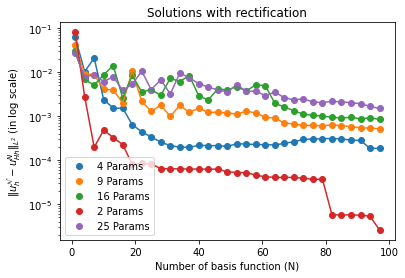

In [17]:
### Case of 9 subdomains 
dir = "errorDatasVar"
id = "63fc89a4b0e9570495446a78"
gc.downloadFolderRecursive(id, dir, sync=True)
cut1 = "errors30Params_s"
cut2 = ".csv"
listdfl2=[]
listlabel =[]

for f in os.listdir(dir):
    n = int(f[len(cut1):-len(cut2)])
    file = os.path.join(dir, f)
    dfG = pd.read_csv(file, sep=',')
    dl2 = getDataStat(dfG,h1norm=False)
    listdfl2.append(dl2)
    listlabel.append(f"{n} Params")

keys='Mean' # or 'Min', or 'Max'
compareListOfDataFrams(listdfl2, norm=keys, listlabel=listlabel, rectif=True)